In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

New things learned
- .sort_values() function function is very efective to group by multiple columns
    -i.e. (df[['column_1','column_2']].value_counts().reset_index(name='count'))
- .reset_index() function will help you to tranform a panda series into a panda dataframe

In [2]:
df_og = pd.read_csv('./Data/netflix_titles.csv')
df = df_og.copy()

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.isna().sum().reset_index().sort_values(by=0, ascending=False)

,index,0
3,director,2634
5,country,831
4,cast,825
6,date_added,10
8,rating,4
9,duration,3
0,show_id,0
1,type,0
2,title,0
7,release_year,0


In [7]:
#Categorical features
categorical_features = []
for column in df.columns:
    if df[column].dtypes == 'object':
        categorical_features.append(column)

In [8]:
categorical_features

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'rating',
 'duration',
 'listed_in',
 'description']

In [9]:
#Handling null values
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [10]:
df.isna().sum().reset_index().sort_values(by=0, ascending=False)

,index,0
9,duration,3
0,show_id,0
1,type,0
2,title,0
3,director,0
4,cast,0
5,country,0
6,date_added,0
7,release_year,0
8,rating,0


In [11]:
for columns in df.columns:
    print(columns, ': ', len(df[columns].unique()),' labels')

show_id :  8807  labels
type :  2  labels
title :  8807  labels
director :  4529  labels
cast :  7693  labels
country :  748  labels
date_added :  1767  labels
release_year :  74  labels
rating :  17  labels
duration :  221  labels
listed_in :  514  labels
description :  8775  labels


### Movie count by rating

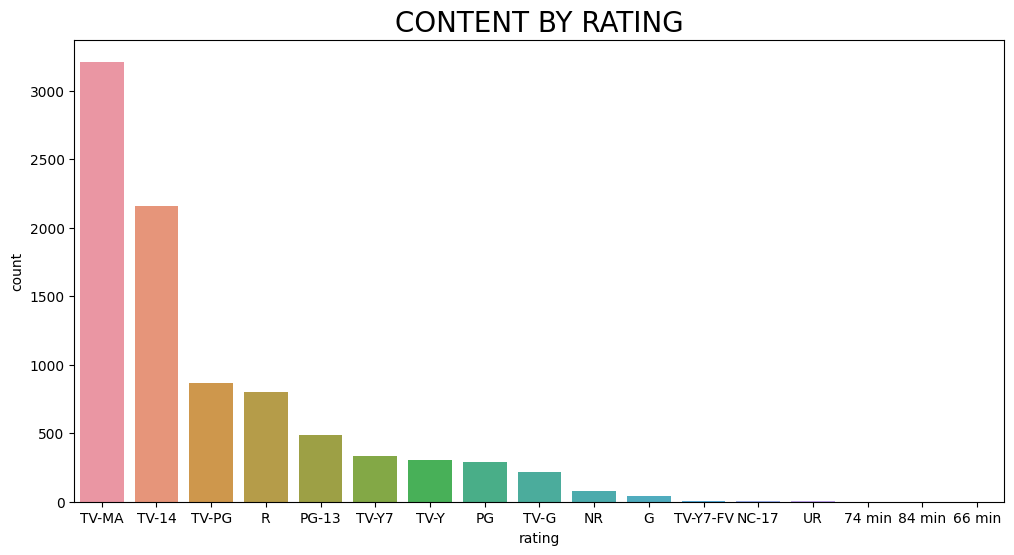

In [12]:
x=df["rating"].value_counts().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x, x='rating', y='count')
plt.title("CONTENT BY RATING",fontsize=20)
plt.show()

The mayority of content is rated as 'TV-MA' aka 'Adults'

In [13]:
test = df.groupby(['country',"type"]).size().reset_index(name='counts').sort_values(by= 'counts', ascending=False)[:10]
test

,country,type,counts
685,United States,Movie,2498
686,United States,TV Show,1151
284,India,Movie,893
581,United Kingdom,TV Show,213
580,United Kingdom,Movie,206
362,Japan,TV Show,169
499,South Korea,TV Show,158
67,Canada,Movie,122
509,Spain,Movie,97
171,Egypt,Movie,92


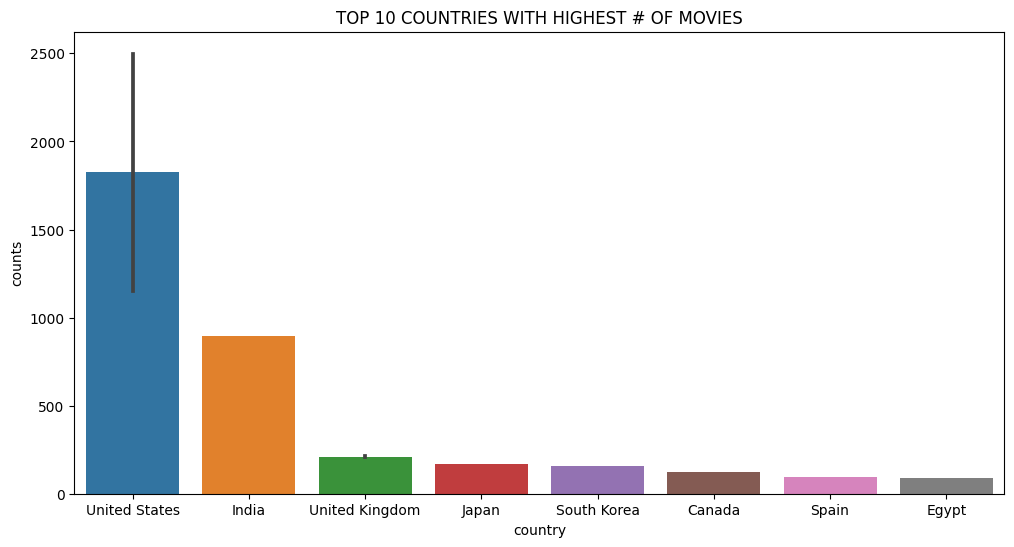

In [14]:
countries = df.groupby(['country',"type"]).size().reset_index(name='counts').sort_values(by= 'counts', ascending=False)[:10]
countries
plt.figure(figsize=(12,6))
sns.barplot(countries, x='country', y='counts')
plt.title("TOP 10 COUNTRIES WITH HIGHEST # OF MOVIES")
plt.show()

US has the highest quantity of movies, followed by INDIA

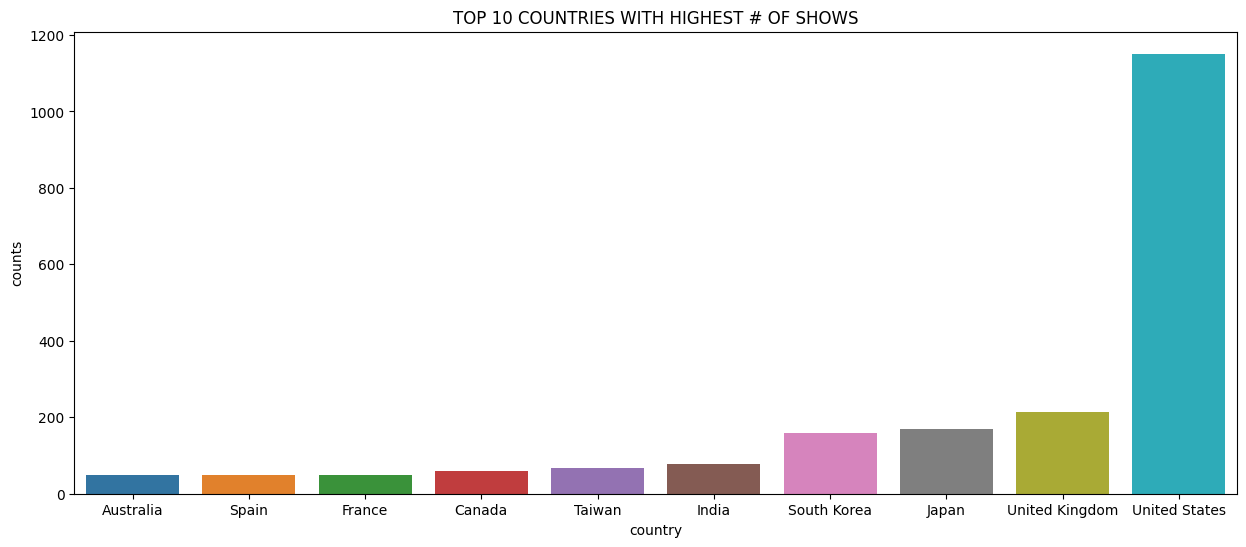

In [15]:
shows = df[df['type']=='TV Show']
countries = shows.groupby(['country',"type"]).size().reset_index(name='counts').sort_values(by= 'counts', ascending=True)[-10:]
countries
plt.figure(figsize=(15,6))
sns.barplot(countries, x='country', y='counts')
plt.title("TOP 10 COUNTRIES WITH HIGHEST # OF SHOWS")
plt.show()

US has the highest quantity of shows, followed by UK

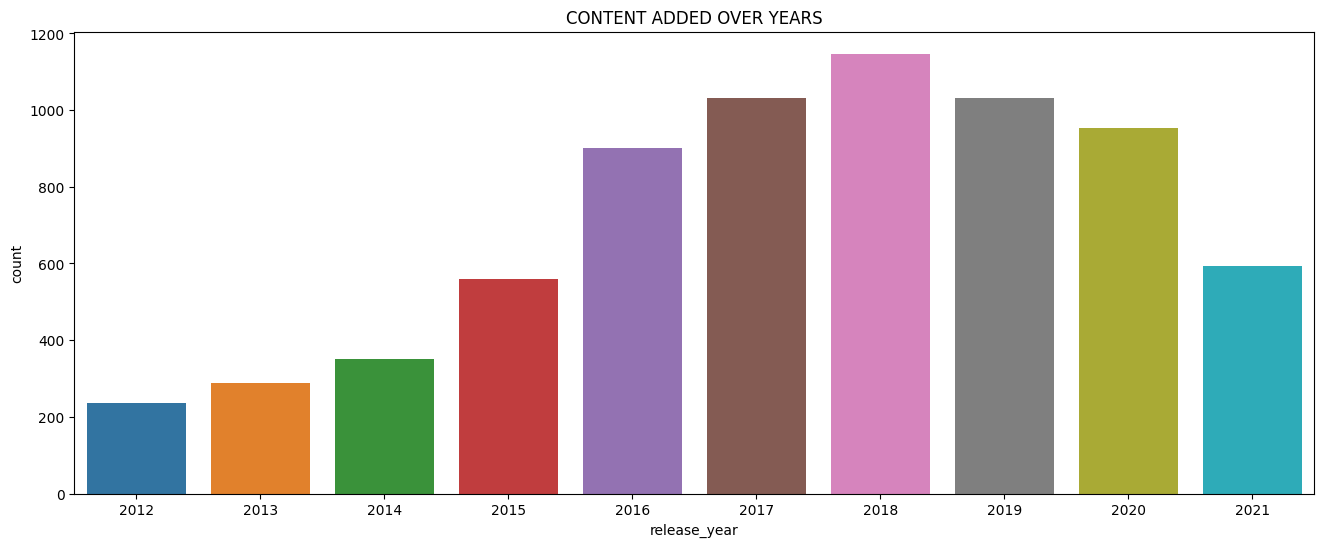

In [16]:
#Content added over year
group_by_year = df.groupby(['release_year']).size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)[:10]
plt.figure(figsize=(16,6))
group_by_year
sns.barplot(group_by_year, x ='release_year', y = 'count')
plt.title('CONTENT ADDED OVER YEARS')
plt.show()

Constant increase in content till 2018

In [17]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

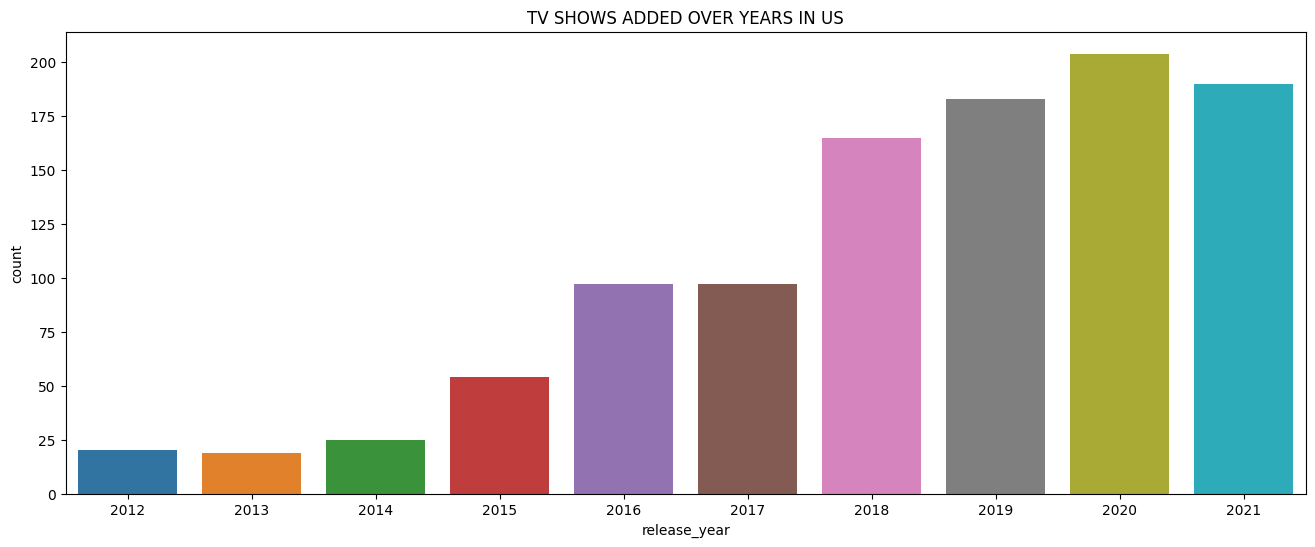

In [18]:
df_USA_shows = df.loc[
    (df['country'] == 'United States') &
    (df['type'] == 'TV Show')
]

group_by_year = df_USA_shows.groupby(['release_year']).size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)[:10]
plt.figure(figsize=(16,6))
group_by_year
sns.barplot(group_by_year, x ='release_year', y = 'count')
plt.title('TV SHOWS ADDED OVER YEARS IN US')
plt.show()


TV Shows were increasing up till 2020... the reduction maybe are due to COVID

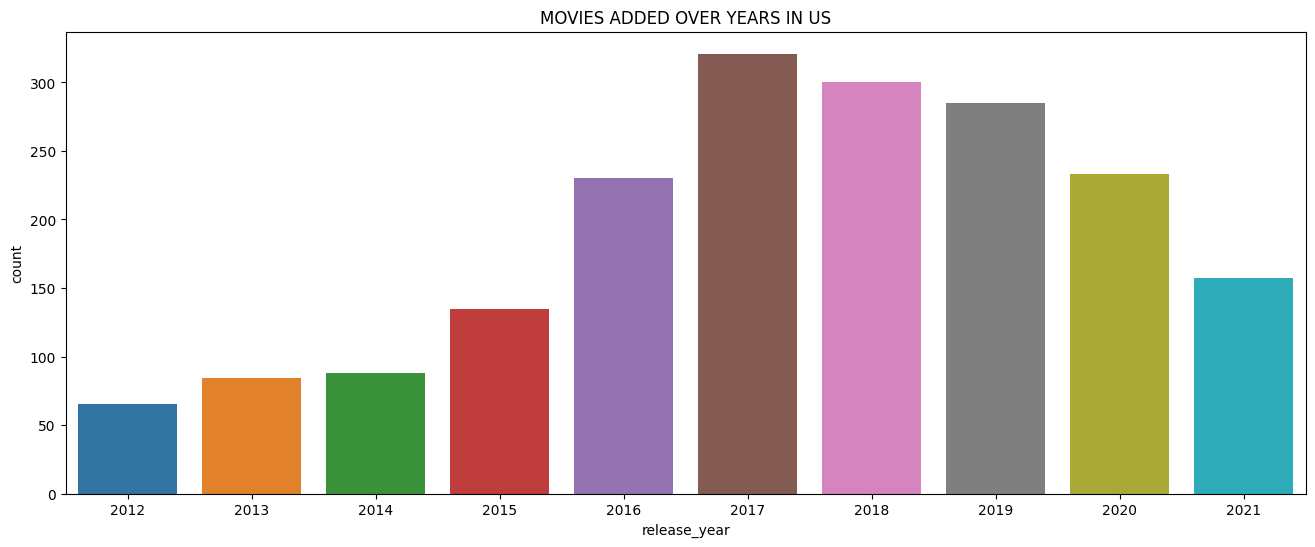

In [19]:
df_USA_Movies = df.loc[
    (df['country'] == 'United States') &
    (df['type'] == 'Movie')
]

group_by_year = df_USA_Movies.groupby(['release_year']).size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)[:10]
plt.figure(figsize=(16,6))
group_by_year
sns.barplot(group_by_year, x ='release_year', y = 'count')
plt.title('MOVIES ADDED OVER YEARS IN US')
plt.show()


Movies were increasing in the US till 2017...

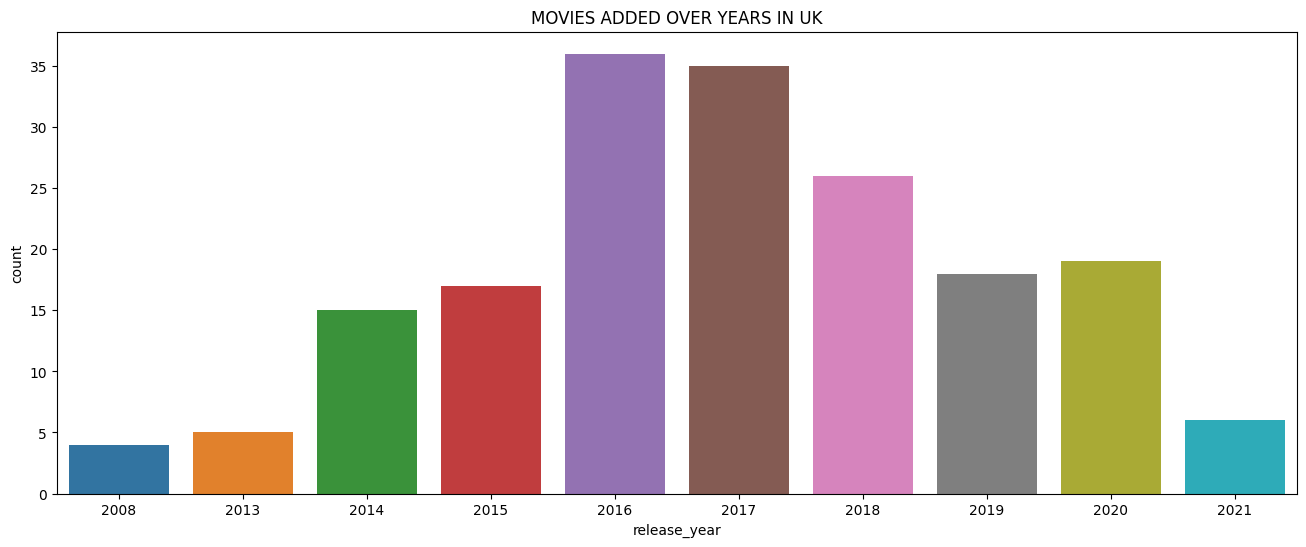

In [23]:
df_UK_Movies = df.loc[
    (df['country'] == 'United Kingdom') &
    (df['type'] == 'Movie')
]

group_by_year = df_UK_Movies.groupby(['release_year']).size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)[:10]
plt.figure(figsize=(16,6))
group_by_year
sns.barplot(group_by_year, x ='release_year', y = 'count')
plt.title('MOVIES ADDED OVER YEARS IN UK')
plt.show()

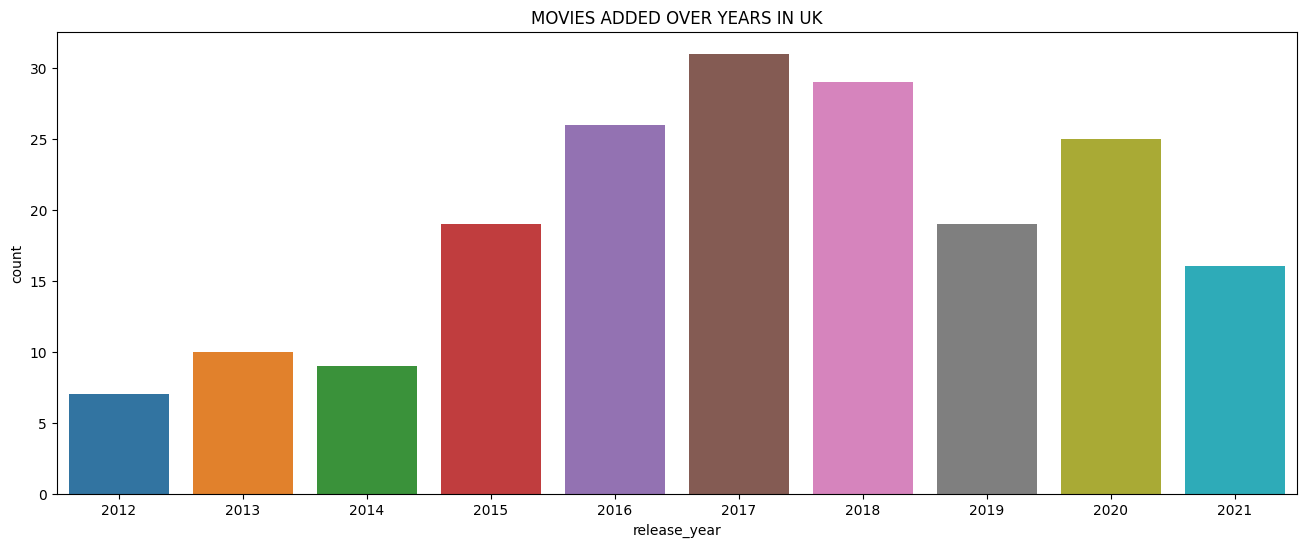

In [22]:
df_UK_TVShows = df.loc[
    (df['country'] == 'United Kingdom') &
    (df['type'] == 'TV Show')
]

group_by_year = df_UK_TVShows.groupby(['release_year']).size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)[:10]
plt.figure(figsize=(16,6))
group_by_year
sns.barplot(group_by_year, x ='release_year', y = 'count')
plt.title('MOVIES ADDED OVER YEARS IN UK')
plt.show()

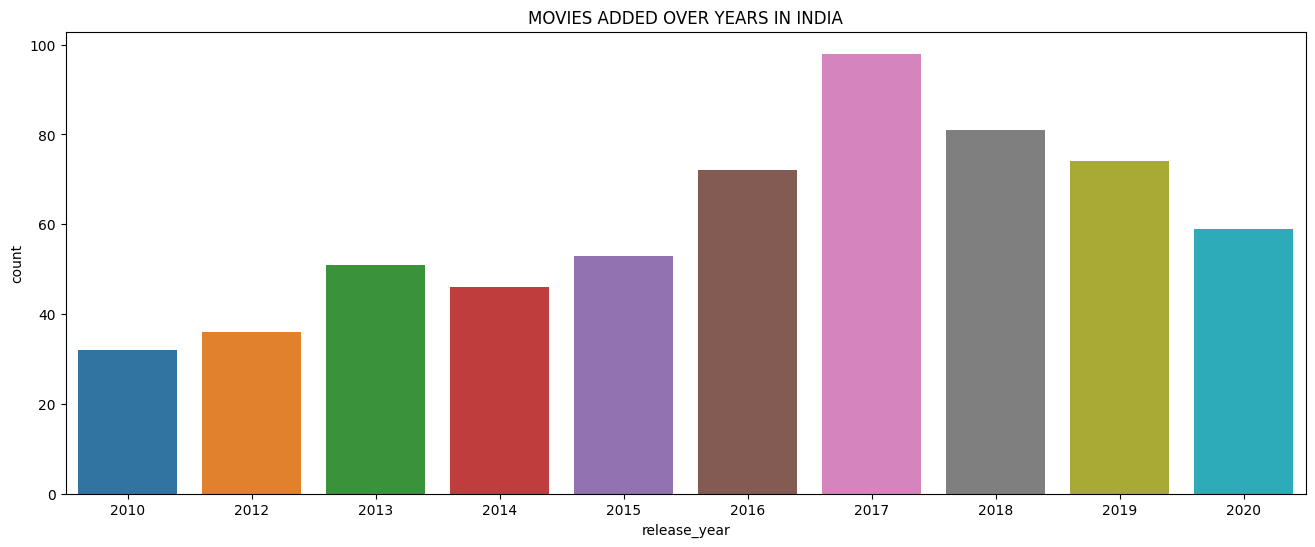

In [27]:
df_INDIA_Movies = df.loc[
    (df['country'] == 'India') &
    (df['type'] == 'Movie')
]

group_by_year = df_INDIA_Movies.groupby(['release_year']).size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)[:10]
plt.figure(figsize=(16,6))
group_by_year
sns.barplot(group_by_year, x ='release_year', y = 'count')
plt.title('MOVIES ADDED OVER YEARS IN INDIA')
plt.show()

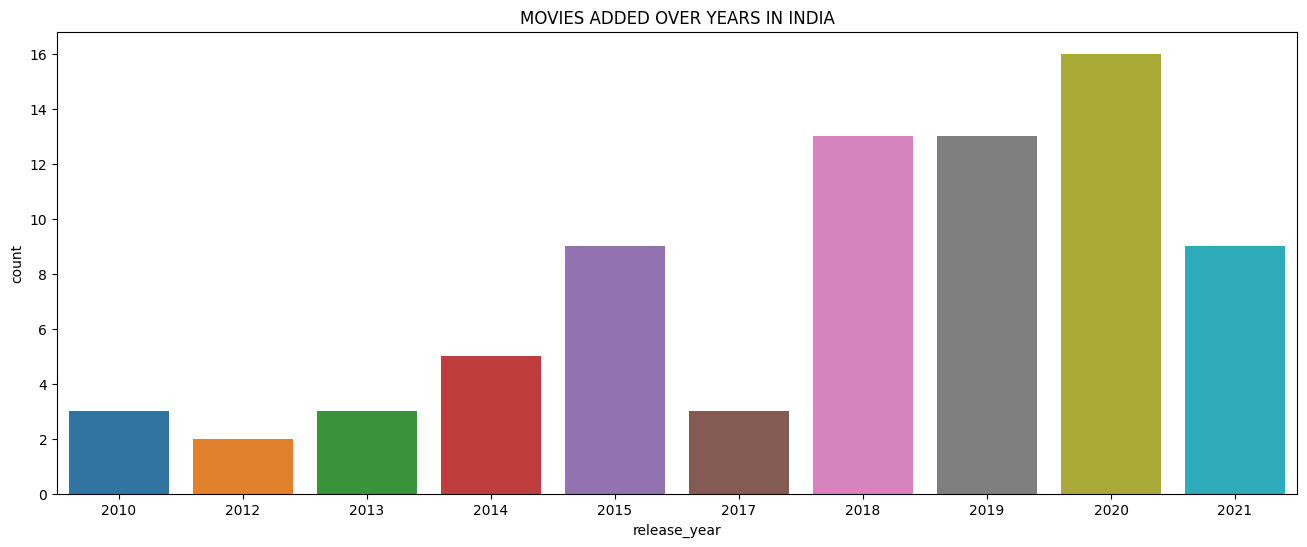

In [26]:
df_INDIA_Movies = df.loc[
    (df['country'] == 'India') &
    (df['type'] == 'TV Show')
]

group_by_year = df_INDIA_Movies.groupby(['release_year']).size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)[:10]
plt.figure(figsize=(16,6))
group_by_year
sns.barplot(group_by_year, x ='release_year', y = 'count')
plt.title('TV SHOW ADDED OVER YEARS IN INDIA')
plt.show()